## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

**Q0.**
1. What is the difference between regression and classification?

Regression is used for numeric data hwile classification is used for catagorical data.

2. What is a confusion table? What does it help us understand about a model's performance?

A confusion table is used to help us understand the accuracy of a  classification model by looking at the actual and perdicted values.

3. What does the SSE quantify about a particular model?

The sum of squared errors quatifies the total difference in actual and predicted values and should almost always be positive.


4. What are overfitting and underfitting?

Overfitting is when the model is too complex for the data while underfitting is when the model is too simple for the data. Both produce unreilable models.

5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?

Because it gives us values of both predicted (from the training set) and actual values (from the test set) that we can compare to see the SSE and overall accuracy.

6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

If we only use class labels the data is easier to understand, however we loose the ability to see how confident the model was that it was the right label.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [2]:
! git clone https://github.com/DS3001/knn

Cloning into 'knn'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 68 (delta 24), reused 26 (delta 12), pack-reused 23 (from 1)
Receiving objects: 100% (68/68), 13.58 MiB | 7.63 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/knn/data/USA_cars_datasets.csv')
df = df.loc[:,['price','year','mileage'] ]
print(df.shape)
print(df.describe())
df.head()

(2499, 3)
              price         year       mileage
count   2499.000000  2499.000000  2.499000e+03
mean   18767.671469  2016.714286  5.229869e+04
std    12116.094936     3.442656  5.970552e+04
min        0.000000  1973.000000  0.000000e+00
25%    10200.000000  2016.000000  2.146650e+04
50%    16900.000000  2018.000000  3.536500e+04
75%    25555.500000  2019.000000  6.347250e+04
max    84900.000000  2020.000000  1.017936e+06


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [4]:
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

df['year'] = maxmin(df['year'])
df['mileage'] = maxmin(df['mileage'])

In [5]:
from sklearn.model_selection import train_test_split
y = df['price']
X = df.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

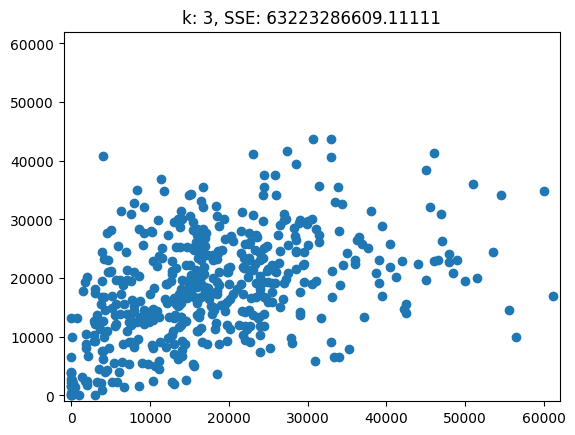

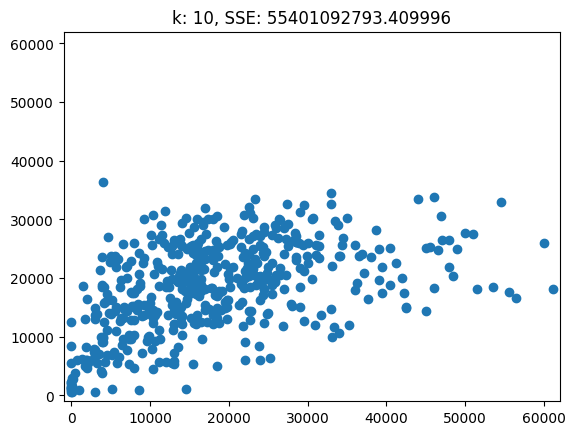

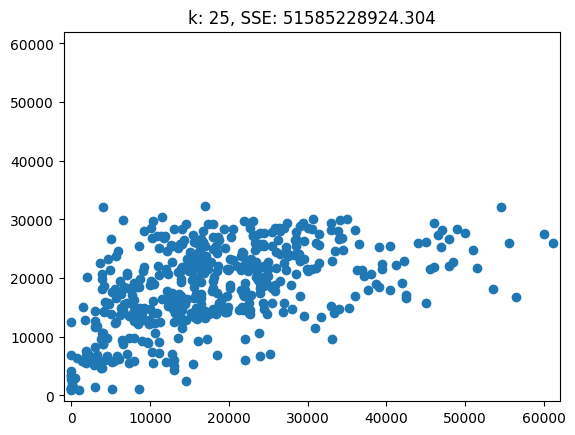

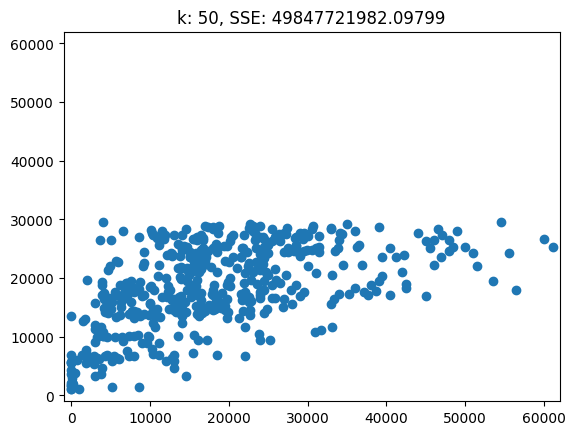

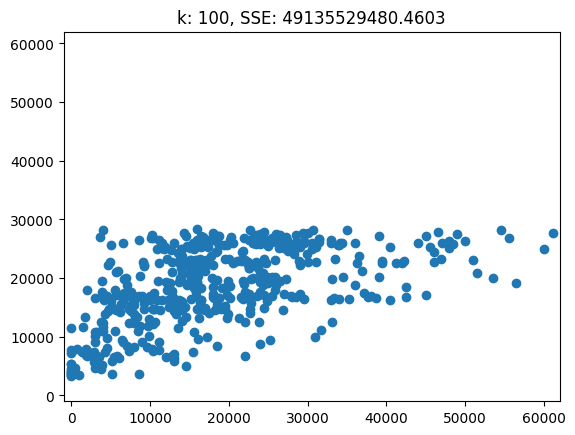

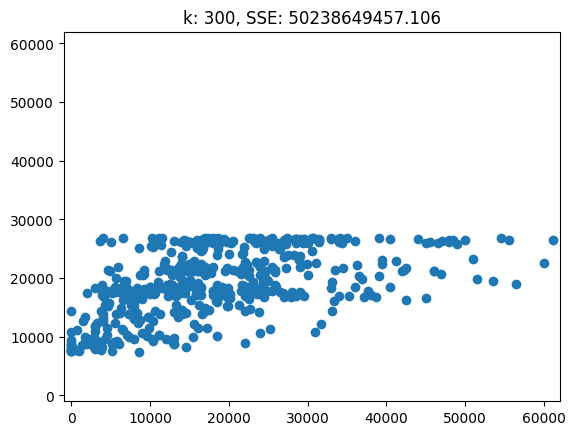

In [6]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

for k in [3,10,25,50,100,300]:
    model = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_hat = model.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )
    plot, axes = plt.subplots()
    plt.scatter(y_test,y_hat)
    plt.title('k: '+str(k)+', SSE: '+str(SSE))
    axes.set_ylim(-1000, 62000)
    axes.set_xlim(-1000, 62000)
    plt.show()

[77]


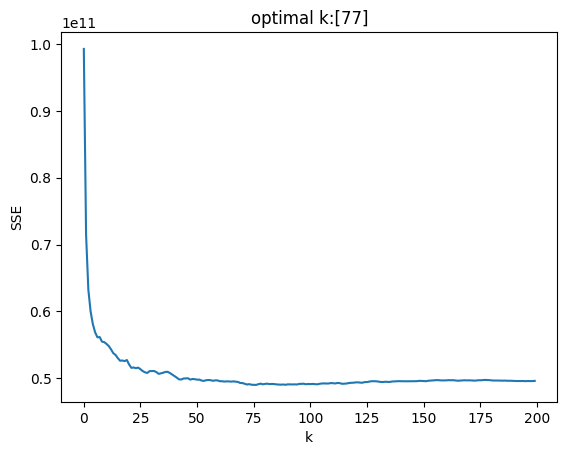

In [7]:

k_bar = 200
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar),SSE)
plt.xlabel("k")
plt.title("optimal k:"+str(k_star))
plt.ylabel('SSE')
plt.show()

Q6) Initally the model underfit the data massively leading to a very high SSE. At 77 the model neither underfits or overfits the data making it have the lowest SSE. Finally anything past 77 overfits the data making the model worse.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [7]:
#1
df = pd.read_csv('/content/knn/data/zoo.csv')
print(df.columns)
print(df.shape)

classes = list(df['class'].unique())
[ print(df.loc[ df['class'] == item, 'animal'].unique()) for item in classes]
class_counts = df['class'].value_counts()
print("\nClass Distribution:\n", class_counts)
df.head()

Index(['animal', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
       'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins',
       'legs', 'tail', 'domestic', 'catsize', 'class'],
      dtype='object')
(101, 18)
['aardvark' 'antelope' 'bear' 'boar' 'buffalo' 'calf' 'cavy' 'cheetah'
 'deer' 'dolphin' 'elephant' 'fruitbat' 'giraffe' 'girl' 'goat' 'gorilla'
 'hamster' 'hare' 'leopard' 'lion' 'lynx' 'mink' 'mole' 'mongoose'
 'opossum' 'oryx' 'platypus' 'polecat' 'pony' 'porpoise' 'puma' 'pussycat'
 'raccoon' 'reindeer' 'seal' 'sealion' 'squirrel' 'vampire' 'vole'
 'wallaby' 'wolf']
['bass' 'carp' 'catfish' 'chub' 'dogfish' 'haddock' 'herring' 'pike'
 'piranha' 'seahorse' 'sole' 'stingray' 'tuna']
['chicken' 'crow' 'dove' 'duck' 'flamingo' 'gull' 'hawk' 'kiwi' 'lark'
 'ostrich' 'parakeet' 'penguin' 'pheasant' 'rhea' 'skimmer' 'skua'
 'sparrow' 'swan' 'vulture' 'wren']
['clam' 'crab' 'crayfish' 'lobster' 'octopus' 'scorpion' 'seawasp' 'slug'
 'starfish' 'worm']
['fl

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


I noticted that the number of animals in each class decreases as the class number increases. I think there is a lot of variation in the covariates and the best predictors will be airborne, aquatic, and predator.

In [8]:
#2
from sklearn.model_selection import train_test_split
x_vars = df.columns.tolist()
y = df['class']
x_vars.remove('animal')
x_vars.remove('class')
X = df.loc[:,x_vars]
X.describe()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.5,random_state=125)

0.9019607843137255
[1]


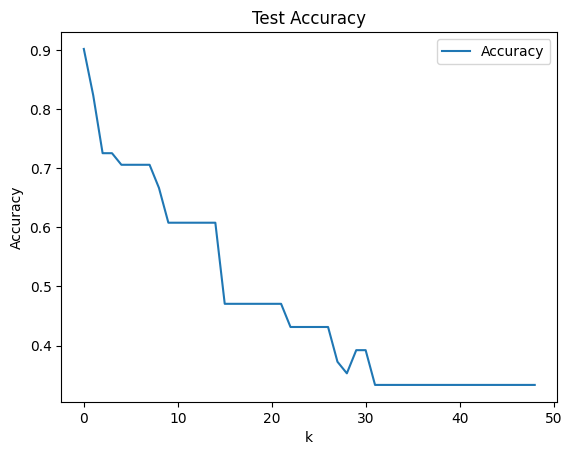

In [9]:
#3
from sklearn.neighbors import KNeighborsClassifier


N_train = len(y_train)
N_test = len(y_test)
k_bar = N_train-1
Acc = np.zeros(k_bar)

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1)
    fitted_model = model.fit(X_train.values,y_train)
    y_hat = fitted_model.predict(X_test.values)
    Acc[k] = np.sum( y_hat == y_test )/N_test

Acc_max = np.max(Acc)
max_index = np.where(Acc==Acc_max)
if len(max_index) > 1:
    print(max_index[len(max_index)])
    max_index = max_index[len(max_index)]
k_star = max_index[0]+1
print(Acc_max)
print(k_star)

plt.plot(np.arange(0,k_bar),Acc,label='Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Test Accuracy')
plt.show()

The optimal K for this model seems to be 1, this is because when me maximize accuracy against all possible Ks the highest accuracy is on 1.

In [10]:
model = KNeighborsClassifier(n_neighbors=k_star[0])
fitted_model = model.fit(X_train.values,y_train)
y_hat = fitted_model.predict(X_test.values)
print('All variables, confusion table:', pd.crosstab(y_hat, y_test))

All variables, confusion table: class   1  2  3  4  5  6  7
row_0                      
1      17  0  1  0  0  0  0
2       0  9  0  0  0  0  0
3       0  0  1  0  0  0  0
4       0  0  1  7  0  0  0
5       0  0  1  0  3  0  0
6       0  0  0  0  0  5  2
7       0  0  0  0  0  0  4


I think that it is rather accuracte as most predicted values matches their actual value. It also seems that the most innacurate class is the predicted 3rd class as it has a majority of inccorect classifications.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

x_vars = df.columns.tolist()
y = df['class']
x_vars.remove('animal')
columns_to_remove = ['class', 'hair', 'feathers', 'eggs', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
for col in columns_to_remove:
    x_vars.remove(col)

X = df.loc[:,x_vars]
print(x_vars)

# Split the data
X_train, X_test, y_train_filtered, y_test_filtered = train_test_split(X, y, test_size=.5, random_state=125)



if len(y_train_filtered) == 0 or len(y_test_filtered) == 0:
    print("Error: One or both of the filtered datasets is empty.")
else:

  N_train = len(y_train)
  N_test = len(y_test)
  k_bar = N_train-1
  Acc = np.zeros(k_bar)

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1)
    fitted_model = model.fit(X_train.values, y_train)
    y_hat = fitted_model.predict(X_test.values)
    Acc[k] = np.sum(y_hat == y_test)/N_test

Acc_max = np.max(Acc)
max_index = np.where(Acc==Acc_max)
if len(max_index) > 1:
    print(max_index[len(max_index)])
    max_index = max_index[len(max_index)]
k_star = max_index[0]+1

model = KNeighborsClassifier(n_neighbors=k_star[0])
fitted_model = model.fit(X_train.values,y_train)
y_hat = fitted_model.predict(X_test.values)
print('All variables, confusion table:', pd.crosstab(y_hat, y_test))

probabilities = model.predict_proba(X_test.values)
print(probabilities)


['milk', 'airborne', 'aquatic']
All variables, confusion table: class   1  2  3  4  5  6  7
row_0                      
1      17  0  0  0  0  0  0
2       0  8  0  0  0  4  0
4       0  0  0  7  3  0  3
6       0  1  4  0  0  1  3
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]


No all classes are not represented since only classes 1, 2, 4, and six are represented by the model. This is most likely becuase the animals in the other classes do not have any values for any of the three selected catagories.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data.

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data.
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE.
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

   veh id manufacturer nameplate    model  CVCM class     EPA class  \
0       1        HONDA     Acura  MDX 4WD          11           SUV   
1       2        HONDA     Acura      RDX          11           SUV   
2       3        HONDA     Acura       RL           4  MIDSIZE CARS   
3       4        HONDA     Acura       TL           4  MIDSIZE CARS   
4       5        HONDA     Acura      TSX           3  COMPACT CARS   

  fleet type fuel type  footprint  baseline price  baseline mpg  \
0          T         G       50.8     45706.20000     22.052700   
1          T         G       45.1     34588.20000     24.174500   
2          C         G       47.6     47934.90000     24.562900   
3          C         G       47.8     35217.81622     27.068237   
4          C         G       46.0     29483.10000     29.855173   

   baseline sales  predicted mpg  
0         57380.0      23.011100  
1         21271.0      26.457747  
2          5132.0      23.773800  
3         56720.0      26.8841

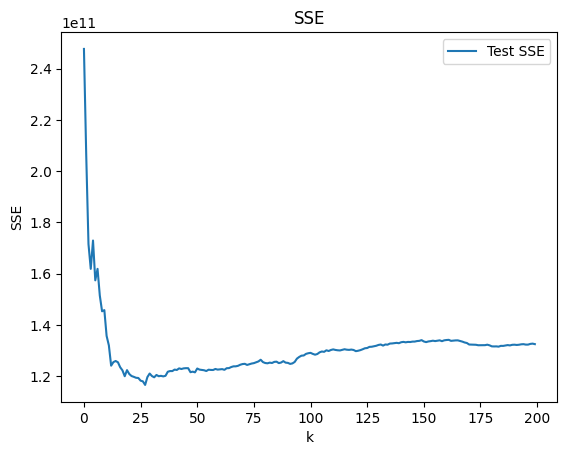

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

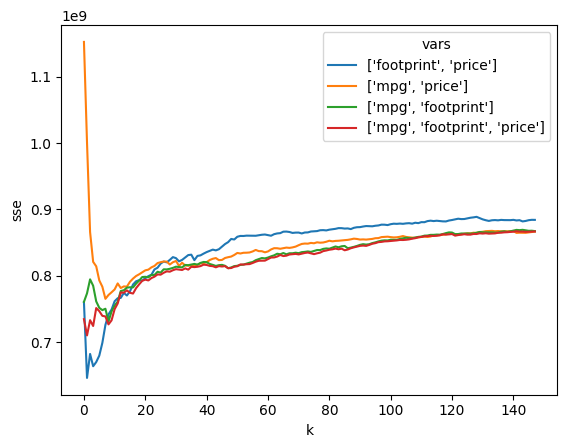

646214942.2865593
765307146.4872227
731167988.5937158
710205461.4358218


In [31]:
#1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('/content/knn/data/cars_env.csv')
print(df.head())

y = df['baseline sales']
X = df.loc[:, ['footprint','baseline mpg','baseline price'] ]

X = X.rename(columns = {'baseline mpg':'mpg','baseline price':'price'})
print(X.head())

#2

def maxmin(z):
    u = (z-min(z))/(max(z)-min(z))
    return u
X = X.apply(maxmin)
X.describe()

#3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=300)

#4
from sklearn.neighbors import KNeighborsRegressor

k_bar = 200
SSE = np.zeros(k_bar)
SSE_on_train = np.zeros(k_bar)
for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )
    y_hat = fitted_model.predict(X_train)
    SSE_on_train[k] = np.sum( (y_train-y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = min_index[0]+1
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test SSE')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()


#The best k is 28 to minimize the SSE

#5

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.4,random_state=10000)

vars1 = ['footprint','price']
vars2 = ['mpg','price']
vars3 = ['mpg','footprint']
vars4 = ['mpg','footprint', 'price']

kgrid = np.arange(2,150)
N = len(y)

SSE_results = []
y_hat_results = []
for var_list in [vars1, vars2, vars3,vars4]:
    X_train_1 = X_train.loc[:,var_list ]
    X_test_1 = X_test.loc[:,var_list]
    SSE = np.zeros(len(kgrid))
    for k in range(len(kgrid)):
        model = KNeighborsRegressor(n_neighbors=kgrid[k])
        fitted_model = model.fit(X_train_1,y_train)
        y_hat = fitted_model.predict(X_test_1)
        y_hat_results.append(y_hat)
        SSE_results.append( {'sse':np.sum( (y_test-y_hat)**2)/N,'vars':str(var_list),'k':k} )
gdf = pd.DataFrame.from_dict(SSE_results)

sns.lineplot(y='sse',x='k',data=gdf,hue='vars')
plt.show()

print( np.min( gdf.loc[gdf['vars'] == str(vars1),'sse']))
print( np.min( gdf.loc[gdf['vars'] == str(vars2),'sse']))
print( np.min( gdf.loc[gdf['vars'] == str(vars3),'sse']))
print( np.min( gdf.loc[gdf['vars'] == str(vars4),'sse']))


\#6 The best combination of variables to predict consumer behavior is footprint and price.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

(338, 4)
    voltage    height  soil  mine_type
0  0.338157  0.000000   0.0          1
1  0.320241  0.181818   0.0          1
2  0.287009  0.272727   0.0          1
3  0.256284  0.454545   0.0          1
4  0.262840  0.545455   0.0          1
          voltage      height        soil   mine_type
count  338.000000  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550    2.952663
std      0.195819    0.306043    0.344244    1.419703
min      0.197734    0.000000    0.000000    1.000000
25%      0.309737    0.272727    0.200000    2.000000
50%      0.359516    0.545455    0.600000    3.000000
75%      0.482628    0.727273    0.800000    4.000000
max      0.999999    1.000000    1.000000    5.000000


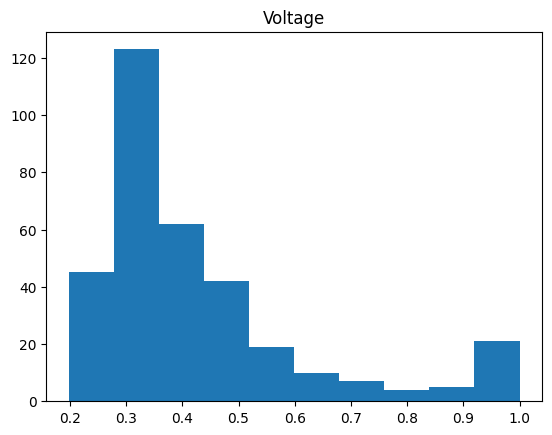

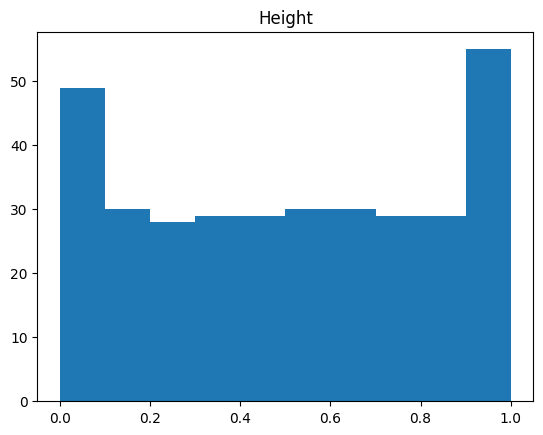

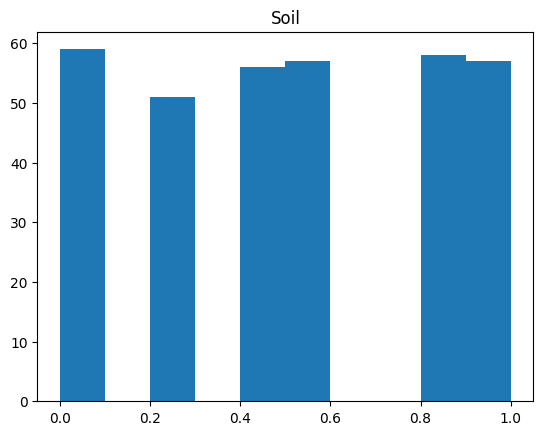

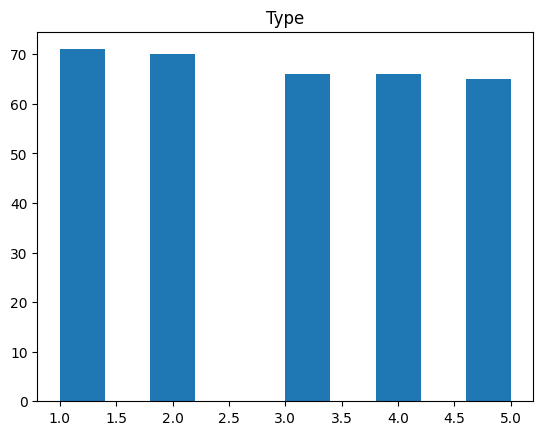

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


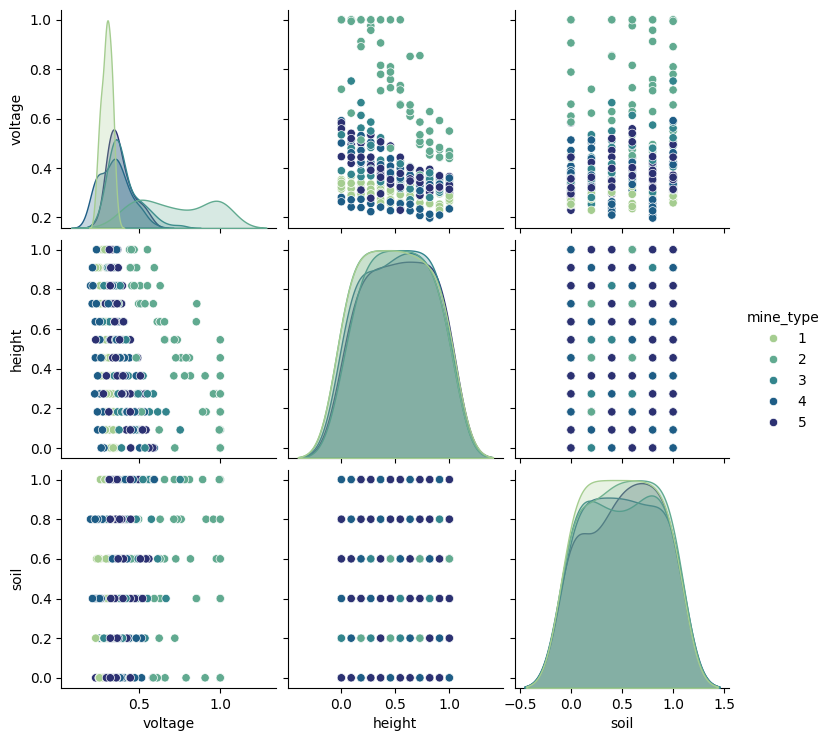

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/knn/data/land_mines.csv')

print(df.shape)
print(df.head())
print(df.describe())

df['voltage'].hist(grid=False)
plt.title('Voltage')
plt.show()

df['height'].hist(grid=False)
plt.title('Height')
plt.show()

df['soil'].hist(grid=False)
plt.title('Soil')
plt.show()

df['mine_type'].hist(grid=False)
plt.title('Type')
plt.show()

sns.pairplot(df, hue="mine_type", palette='crest')

Maximum accuracy:  0.41420118343195267
Optimal k:  [2]


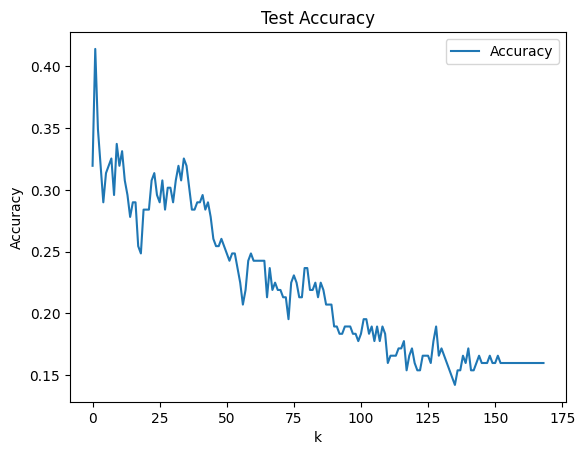

mine_type   1   2   3   4   5
row_0                        
1          23   1  12  14  11
2           0  32   1   5   1
3           9   4  10   9  15
4           4   3   3   4   2
5           1   0   1   3   1


In [34]:
#2
y = df['mine_type']
X = df.loc[:,['voltage','height','soil']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.5, random_state=200)

#3
N_train = len(y_train)
N_test = len(y_test)


k_bar = N_train
Acc = np.zeros(k_bar)

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1)
    fitted_model = model.fit(X_train.values,y_train)
    y_hat = fitted_model.predict(X_test.values)
    Acc[k] = np.sum( y_hat == y_test )/N_test
Acc_max = np.max(Acc)
max_index = np.where(Acc==Acc_max)
k_star = max_index[0]+1
print('Maximum accuracy: ', Acc_max)
print('Optimal k: ', k_star)


plt.plot(np.arange(0,k_bar),Acc,label='Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Test Accuracy')
plt.show()

model = KNeighborsClassifier(n_neighbors=k_star[0]) # Create a sk model for k
fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test.values) # Predict values for test set

#4
print(pd.crosstab(y_hat, y_test))




\#4 The model is not very accurate mainly when prediecting that mines are of the first type.

\#5 I would advise them to only assume a mine is predicted correctly if the number of predicted values that are correct is much higher than the incorrect sum. Essentially only use the model to find mines of type 2.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

(299, 13)
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000      

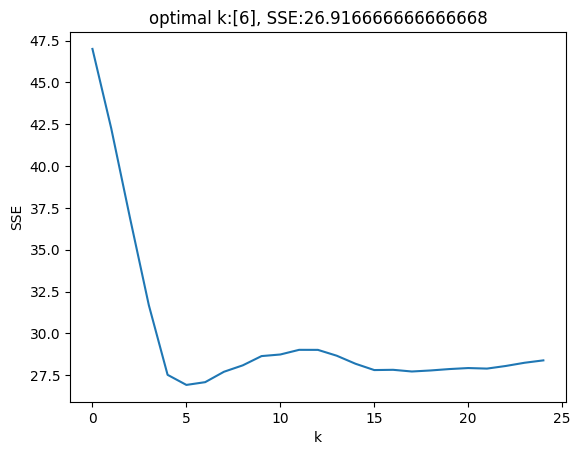

[83]


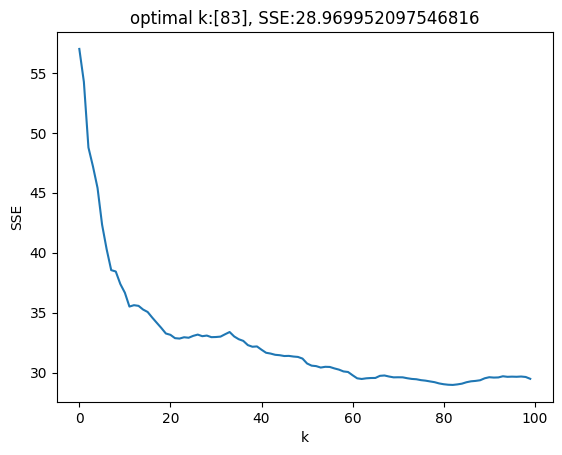

In [38]:
#1
import pandas as pd
import numpy as np
df = pd.read_csv('/content/knn/data/heart_failure_clinical_records_dataset.csv')
print(df.shape)
print(df.describe())

df = df.drop('time',axis=1)

#2
print(df.corr())
#The varibales that are most strongly associated with death are age, ejection fraction, and serum creatine.

#3
vars = ['anaemia','diabetes','high_blood_pressure','sex','smoking']
for var in vars:
    print(df.loc[:,[var,'DEATH_EVENT']].groupby(var).describe())
# the strongest predictors are animea and HBP with a mean increase of .6 and .8 for a death event when either occur.

#4
y = df['DEATH_EVENT']
vars = ['age','ejection_fraction','serum_creatinine','high_blood_pressure','anaemia']
X = df.loc[:,vars]

#5
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u
X = X.apply(maxmin)

#6
np.random.seed(100)
N = X.shape[0]
all = np.arange(1,N)
train = np.random.choice(N,int(.8*N) )
test = [item for item in all if item not in train]


X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

#7
from sklearn.neighbors import KNeighborsRegressor

k_bar = 25
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(X_train,y_train)
    y_hat = knn.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar),SSE)
plt.xlabel("k")
plt.title("optimal k:"+str(k_star)+', SSE:'+str(SSE_min))
plt.ylabel('SSE')
plt.show()

#8
X = df.drop('DEATH_EVENT',axis=1)

X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

from sklearn.neighbors import KNeighborsRegressor

k_bar = 100
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(X_train,y_train)
    y_hat = knn.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar),SSE)
plt.xlabel("k")
plt.title("optimal k:"+str(k_star)+', SSE:'+str(SSE_min))
plt.ylabel('SSE')
plt.show()

The model with the lower sum square error is the simler model since it has a SSE of 26.9 while the other has an SSE of 28.9. I think that in practice I would use the second model however because it cover more varibales than the original meaning it can be more useful in cases other than the select few we chose to model. These additional varibles do however increase the SSE of the model as they add more complexity which can make it less accurate.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.

   Review Scores Rating Price  Beds
0                   NaN   145   1.0
1                   NaN    37   1.0
2                   NaN    28   1.0
3                   NaN   199   3.0
4                  96.0   549   3.0
       Review Scores Rating          Beds
count          22155.000000  30393.000000
mean              91.993230      1.530089
std                8.850373      1.015359
min               20.000000      0.000000
25%               89.000000      1.000000
50%               94.000000      1.000000
75%              100.000000      2.000000
max              100.000000     16.000000
       Review Scores Rating         Price          Beds
count          22155.000000  30478.000000  30393.000000
mean              91.993230    163.589737      1.530089
std                8.850373    197.785454      1.015359
min               20.000000     10.000000      0.000000
25%               89.000000     80.000000      1.000000
50%               94.000000    125.000000      1.000000
75%           

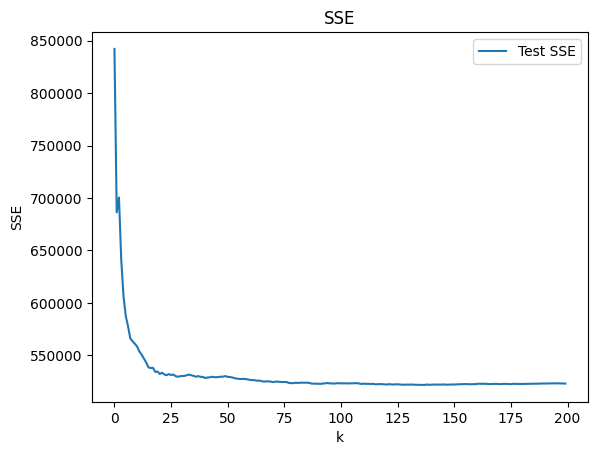

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'Imputed versus Actual Values')

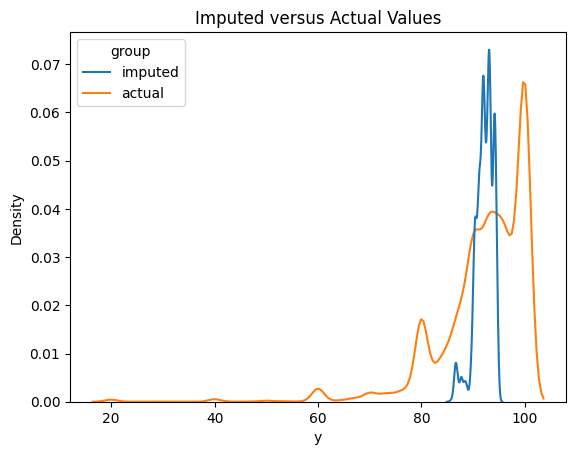

In [40]:
#1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('/content/knn/data/airbnb_hw.csv')
df = df.loc[:,['Review Scores Rating','Price','Beds'] ]
print(df.head())

print(df.describe())

df['Price'] = df['Price'].str.replace(',','')
df['Price'] = pd.to_numeric( df['Price'], errors='coerce')

print(df.describe())
print(df.dtypes)

df = df.rename(columns={'Price':'price','Beds':'beds','Review Scores Rating':'review'})

#2
select = df['review'].isnull()
df_to_impute = df.loc[select,:]

#3
df = df.dropna(axis=0,how='any')

#4
y = df['review']
X = df.loc[:,['price','beds'] ]


from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=300)

k_bar = 200
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )
    y_hat = fitted_model.predict(X_train)

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = min_index[0]+1
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test SSE')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()


model = KNeighborsRegressor(n_neighbors=k_star[0])
fitted_model = model.fit(X_train,y_train)


x_impute = df_to_impute.loc[:,['price','beds'] ]
x_impute = x_impute.dropna(axis=0,how='any')
y_impute = fitted_model.predict(x_impute)

#6
imputed = pd.DataFrame.from_dict({ 'y':y_impute,'group':'imputed'})
true = pd.DataFrame.from_dict({'y':df['review'],'group':'actual'})
gdf = pd.concat([imputed,true],axis=0)

sns.kdeplot(x='y',hue='group',data=gdf)
plt.title('Imputed versus Actual Values')

\#6 The imputed values have a much smaller domain than the actual values.